In [1]:
model_name = 'posenet1' #change
from models import PoseNet1
image_size = 224
three_d = False

if(three_d):
    output_size = 63
    dimension = 3
else:
    output_size = 42
    dimension = 2
    
net = PoseNet1(image_size, kernels = [5,5,5,5], output_size=output_size) #change
n_epochs = 2
batch_size = 64

import os
import torch
import torch.nn as nn
import torch.optim as optim
import numpy as np
import matplotlib.pyplot as plt
from torchvision import transforms
from torch.utils.data import DataLoader
from data_load import JointKeypointsDataset, Rescale, Normalize, ToTensor

def init_weights(layer):
    for part in layer:
        if type(part) == nn.Linear:
            torch.nn.init.xavier_normal_(part.weight, gain=nn.init.calculate_gain('relu'))
            part.bias.data.fill_(0.01)

def train_net(n_epochs):
    net.train()

    for epoch in range(n_epochs):
        running_loss = 0.0

        for batch_i, data in enumerate(train_loader):
            images = data['image']
            key_pts = data['keypoints']
            key_pts = key_pts.view(key_pts.size(0), -1)
            key_pts = torch.tensor(key_pts, device="mps", dtype=torch.float32)
            images = torch.tensor(images, device="mps", dtype=torch.float32)
            output_pts = net(images)
            loss = criterion(output_pts, key_pts)
            optimizer.zero_grad()
            loss.backward()
            optimizer.step()
            running_loss += loss.item()
            if batch_i % 10 == 9:
                print('Epoch: {}, Batch: {}, Avg. Loss: {}'.format(epoch + 1, batch_i+1, running_loss))
                running_loss = 0.0

    print('Finished Training')

def net_sample_output():
    for i, sample in enumerate(test_loader):
        images = sample['image']
        key_pts = sample['keypoints']
        images = torch.tensor(images, device="mps", dtype=torch.float32)
        output_pts = net(images)
        output_pts = output_pts.view(output_pts.size()[0], 21, -1)
        
        if i == 0:
            return images, output_pts, key_pts
        
def show_all_keypoints(image, predicted_key_pts, gt_pts=None):
    plt.imshow(image, cmap='gray')
    plt.scatter(predicted_key_pts[:, 1], 224 - predicted_key_pts[:, 0], s=20, marker='.', c='m')
    
    if gt_pts is not None:
        plt.scatter(gt_pts[:, 1], 224 - gt_pts[:, 0], s=20, marker='.', c='g')
        
def visualize_output(test_images, test_outputs, gt_pts=None, batch_size=10):
    plt.figure(figsize=(20, 8))
    
    for i in range(batch_size):
        ax = plt.subplot(3, 5, i+1)
        image = test_images[i].data
        image = image.numpy()
        image = np.transpose(image, (1, 2, 0))
        predicted_key_pts = test_outputs[i].data
        predicted_key_pts = predicted_key_pts.numpy() 
        predicted_key_pts = predicted_key_pts*50.0+100
        ground_truth_pts = None
        
        if gt_pts is not None:
            ground_truth_pts = gt_pts[i]         
            ground_truth_pts = ground_truth_pts*50.0+100
            
        show_all_keypoints(np.squeeze(image), predicted_key_pts, ground_truth_pts)
        plt.axis('off')

    plt.show()

%load_ext autoreload
%autoreload 2
model_path = 'pose_estimators/'+model_name+'_'+str(dimension)+'d.pt'

if(os.path.isfile(model_path)):
    net.load_state_dict(torch.load(model_path))
else:
    init_weights(net.fc1)
    init_weights(net.fc2)
    init_weights(net.fc3)
    
net.to(torch.device('mps'))
criterion = nn.MSELoss()
optimizer = optim.Adam(params = net.parameters())
print(net)
data_transform = transforms.Compose([Rescale(224, dimension), Normalize(), ToTensor()])
train_dataset = JointKeypointsDataset(csv_file='data/training_keypoints_'+str(dimension)+'d.csv', root_dir='data/training/', transform=data_transform, dimension=dimension)
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True, num_workers=4)
test_dataset = JointKeypointsDataset(csv_file='data/test_keypoints_'+str(dimension)+'d.csv', root_dir='data/test/', transform=data_transform, dimension=dimension)
test_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=True, num_workers=4)

conv1:
Conv2d(1, 32, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2))
ReLU()

maxp1:
MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
Dropout(p=0, inplace=False)
BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)

conv2:
Conv2d(32, 64, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2))
ReLU()

maxp2:
MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
Dropout(p=0, inplace=False)
BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)

conv3:
Conv2d(64, 128, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2))
ReLU()

maxp3:
MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
Dropout(p=0, inplace=False)
BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)

conv4:
Conv2d(128, 256, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2))
ReLU()

maxp4:
MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
Dropout(p=0, inpla

In [2]:
train_net(n_epochs)

/var/folders/q5/m699cclx59548cxd1fgmr0c40000gn/T/ipykernel_24556/3757350963.py:43: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  key_pts = torch.tensor(key_pts, device="mps", dtype=torch.float32)
/var/folders/q5/m699cclx59548cxd1fgmr0c40000gn/T/ipykernel_24556/3757350963.py:44: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  images = torch.tensor(images, device="mps", dtype=torch.float32)


Epoch: 1, Batch: 10, Avg. Loss: 1.7003514720126987
Epoch: 1, Batch: 20, Avg. Loss: 0.5435353126376867
Epoch: 1, Batch: 30, Avg. Loss: 0.2661544606089592
Epoch: 1, Batch: 40, Avg. Loss: 0.14177223108708858
Epoch: 1, Batch: 50, Avg. Loss: 0.14024341106414795
Epoch: 1, Batch: 60, Avg. Loss: 0.0992708234116435
Epoch: 1, Batch: 70, Avg. Loss: 0.08895164402201772
Epoch: 1, Batch: 80, Avg. Loss: 0.07592784613370895
Epoch: 1, Batch: 90, Avg. Loss: 0.08689604187384248
Epoch: 1, Batch: 100, Avg. Loss: 0.06898451363667846
Epoch: 1, Batch: 110, Avg. Loss: 0.08431432861834764
Epoch: 1, Batch: 120, Avg. Loss: 0.08544956217519939
Epoch: 1, Batch: 130, Avg. Loss: 0.06426067790016532
Epoch: 1, Batch: 140, Avg. Loss: 0.0987299915868789
Epoch: 2, Batch: 10, Avg. Loss: 0.2509242743253708
Epoch: 2, Batch: 20, Avg. Loss: 0.1514279842376709
Epoch: 2, Batch: 30, Avg. Loss: 0.14534010645002127
Epoch: 2, Batch: 40, Avg. Loss: 0.3058685092255473
Epoch: 2, Batch: 50, Avg. Loss: 0.2298219259828329
Epoch: 2, Batch:

/var/folders/q5/m699cclx59548cxd1fgmr0c40000gn/T/ipykernel_24556/3757350963.py:61: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  images = torch.tensor(images, device="mps", dtype=torch.float32)


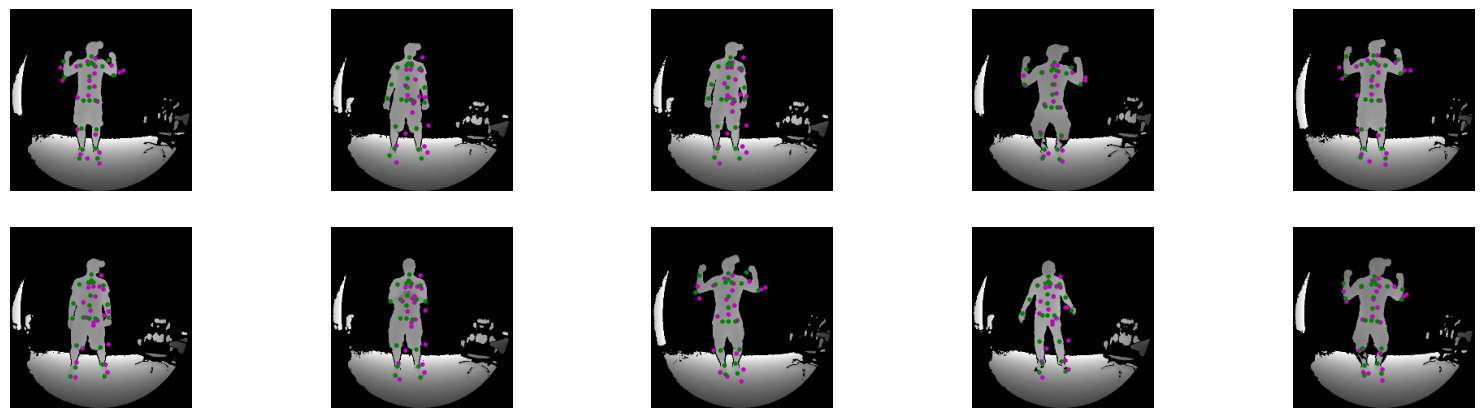

In [3]:
torch.save(net.state_dict(), model_path)

if(not three_d):
    test_images, test_outputs, gt_pts = net_sample_output()
    test_images = test_images.cpu()
    test_outputs = test_outputs.cpu()
    gt_pts = gt_pts.cpu()
    visualize_output(test_images, test_outputs, gt_pts)